In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('car_data.csv')
car.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df=pd.DataFrame(data=car)
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [4]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_values'],
      dtype='object')

In [5]:
df.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
class_values    object
dtype: object

In [6]:
df.shape

(1728, 7)

In [7]:
df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
class_values    0
dtype: int64

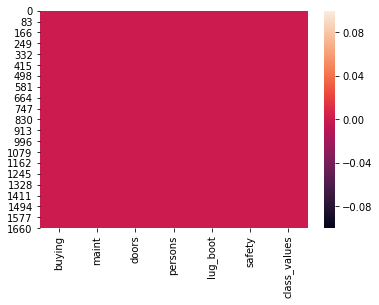

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class_values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,4,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [10]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [12]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
le_count=0
for col in df.columns[:]:
    if df[col].dtypes=='object':
        if len(list(df[col].unique()))<=4:
            le.fit(df[col])
            df[col]=le.fit_transform(df[col])
            le_count +=1

In [17]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [18]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class_values
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


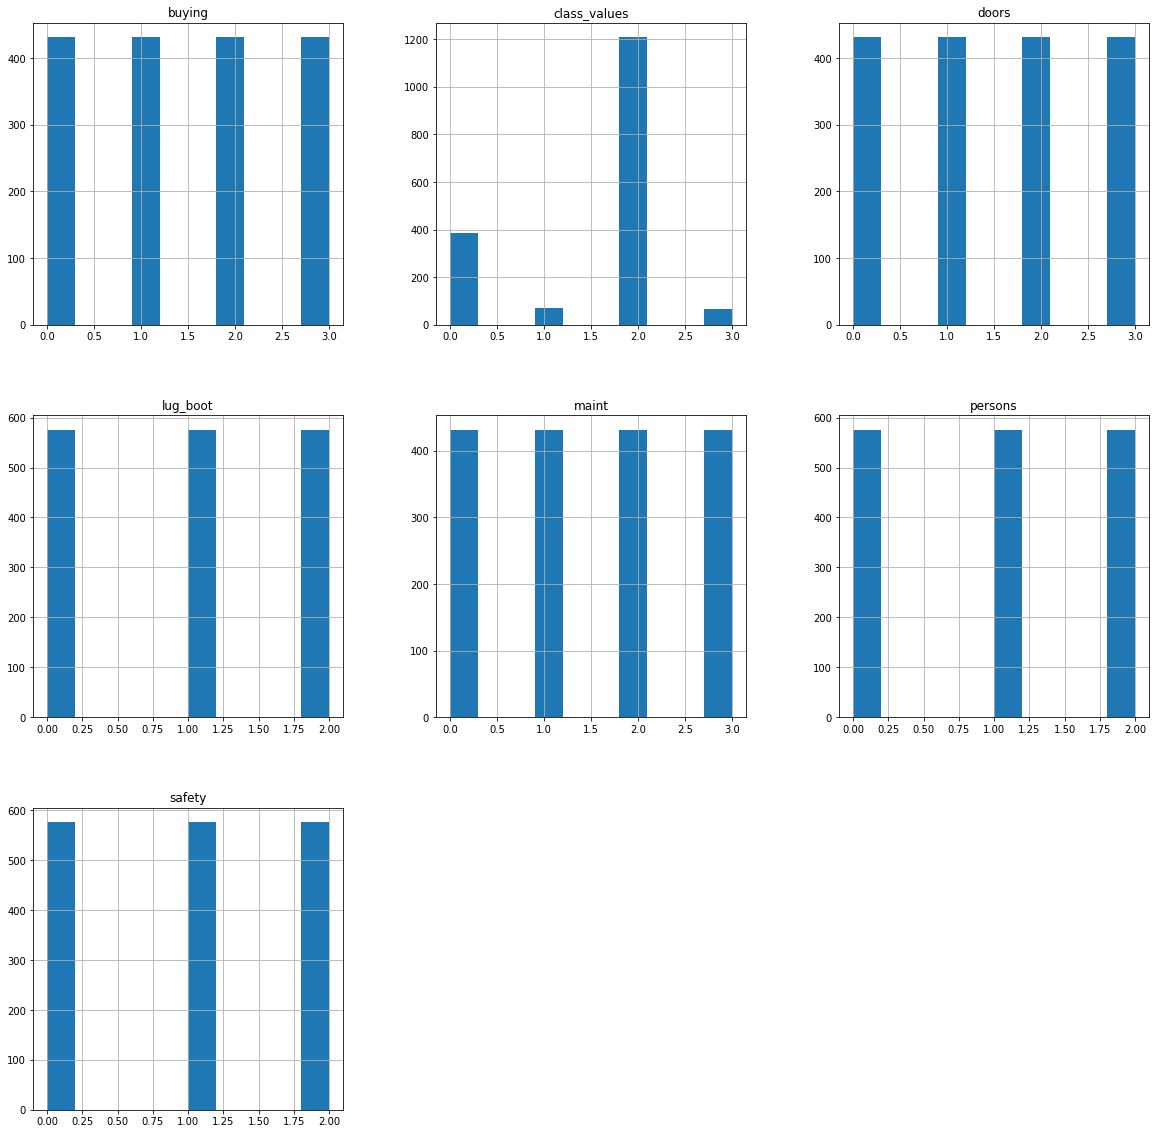

In [19]:
df.hist(figsize=(20,20))
plt.show()

In [20]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


{'whiskers': [<matplotlib.lines.Line2D at 0x2b8c00da708>,
 'caps': [<matplotlib.lines.Line2D at 0x2b8c00dafc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b8bf489c48>],
 'medians': [<matplotlib.lines.Line2D at 0x2b8c00dbf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b8c00dfdc8>],
 'means': []}

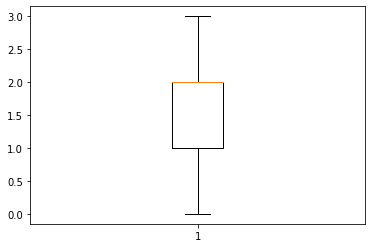

In [21]:
plt.boxplot(df['class_values'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2297ad760c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2297b313748>,
 'cmins': <matplotlib.collections.LineCollection at 0x2297b34bc48>,
 'cbars': <matplotlib.collections.LineCollection at 0x2297b34b348>}

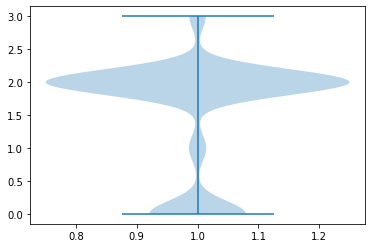

In [24]:
plt.violinplot(df['class_values'])

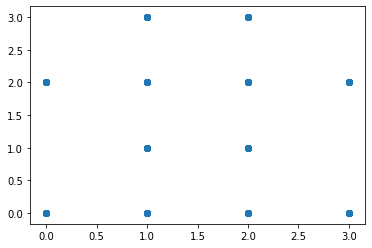

In [25]:
plt.scatter('buying','class_values',data=df)

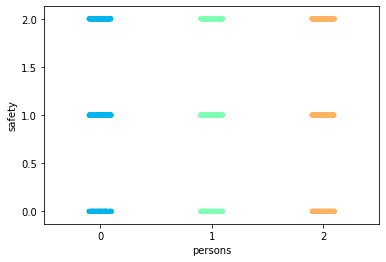

In [26]:
sns.stripplot('persons','safety',data=df,palette='rainbow')

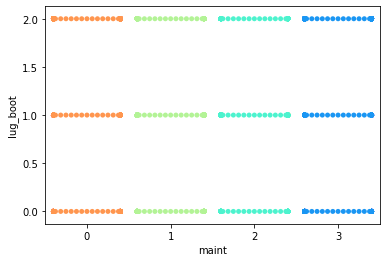

In [27]:
sns.swarmplot('maint','lug_boot',data=df,palette='rainbow_r')

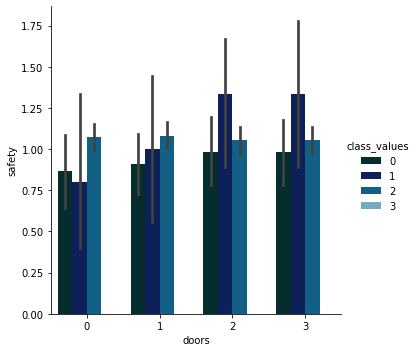

In [30]:
sns.catplot('doors','safety',hue='class_values',data=df,palette='ocean',kind='bar')

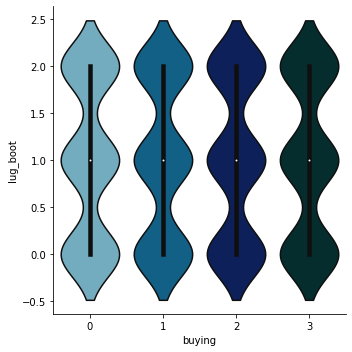

In [31]:
sns.catplot('buying','lug_boot',data=df,palette='ocean_r',kind='violin')

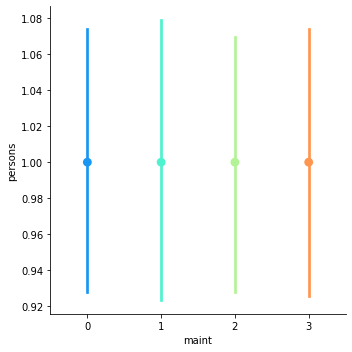

In [32]:
sns.catplot('maint','persons',data=df,palette='rainbow',kind='point')

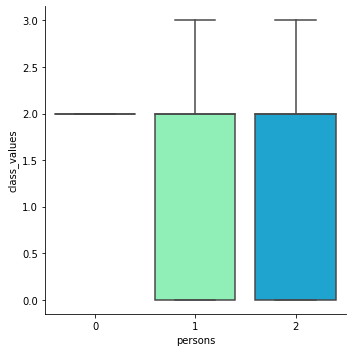

In [33]:
sns.catplot('persons','class_values',data=df,palette='rainbow_r',kind='box')

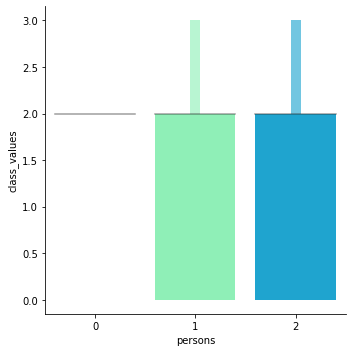

In [34]:
sns.catplot('persons','class_values',data=df,palette='rainbow_r',kind='boxen')

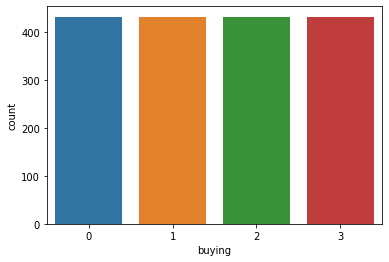

In [35]:
sns.countplot(df['buying'])

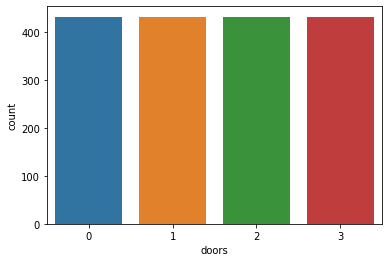

In [36]:
sns.countplot(df['doors'])

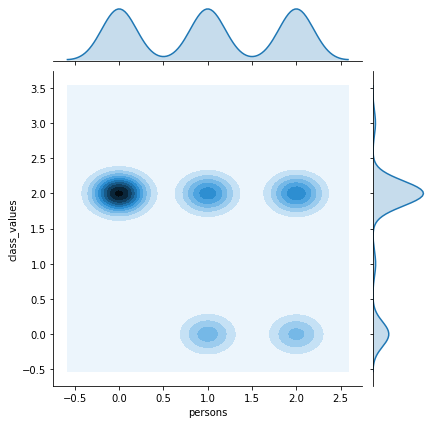

In [37]:
sns.jointplot('persons','class_values',data=df,kind='kde')

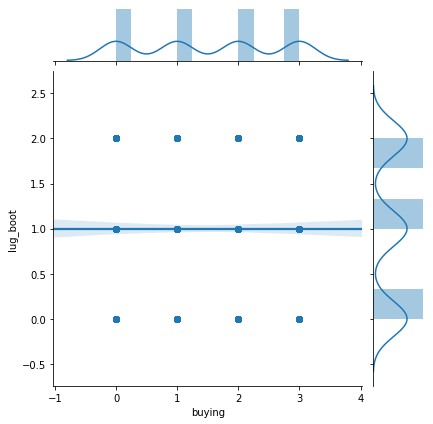

In [38]:
sns.jointplot('buying','lug_boot',data=df,kind='reg')

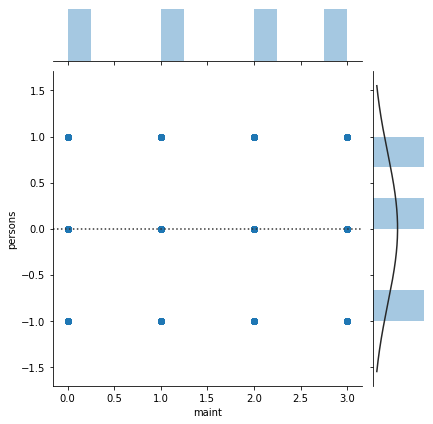

In [39]:
sns.jointplot('maint','persons',data=df,kind='resid')

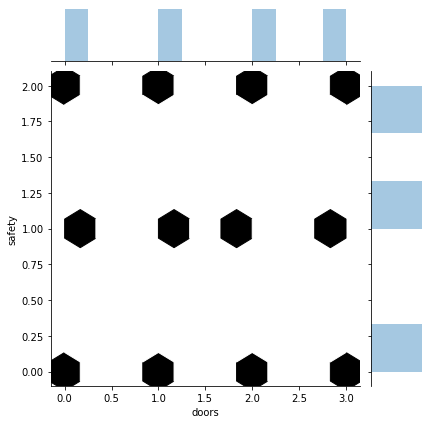

In [41]:
sns.jointplot('doors','safety',data=df,kind='hex')

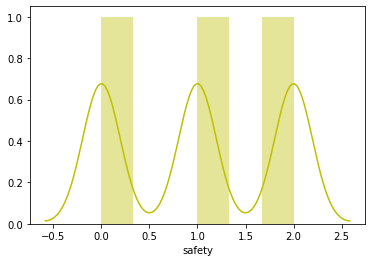

In [42]:
sns.distplot(df['safety'],color='y')

In [22]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_values'],
      dtype='object')

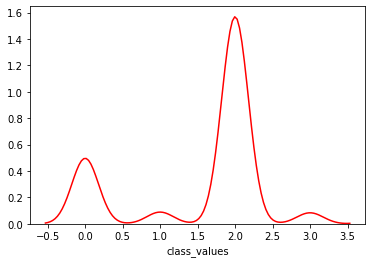

In [43]:
sns.distplot(df['class_values'],color='r',hist=False)

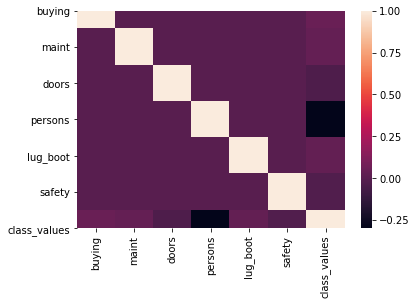

In [22]:
sns.heatmap(df.corr())

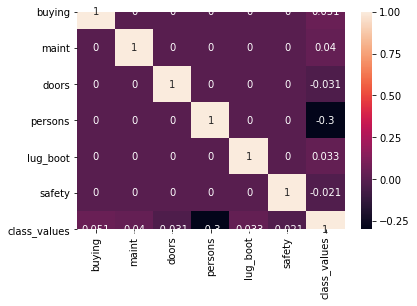

In [23]:
sns.heatmap(df.corr(),annot=True)

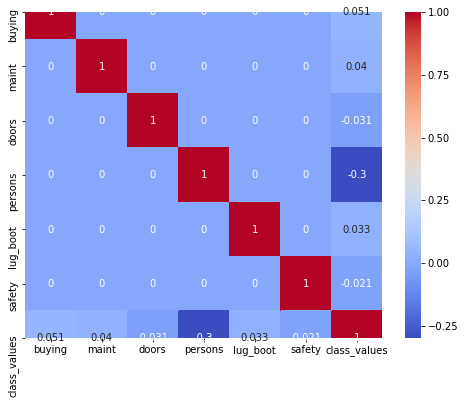

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [25]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [26]:
df.shape

(1728, 7)

In [27]:
x=df.iloc[:,0:-1]
x.shape

(1728, 6)

In [28]:
y=df.iloc[:,-1]
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class_values, Length: 1728, dtype: int32

In [29]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),LogisticRegression(),MultinomialNB()]

In [33]:
max_acu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        acu_values=accuracy_score(y_test,predm)
        print('Accuracy socore correspond to random state',r_state,'is:',acu_values)
        if acu_values>max_acu_score:
            max_acu_score=acu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print('Maximum accuracy score correspond to random state',final_state,'is',max_acu_score,'and model is',final_model)

Accuracy socore correspond to random state 40 is: 0.9156626506024096
Accuracy socore correspond to random state 40 is: 0.980722891566265
Accuracy socore correspond to random state 40 is: 0.9421686746987952
Accuracy socore correspond to random state 40 is: 0.7012048192771084
Accuracy socore correspond to random state 40 is: 0.727710843373494
Accuracy socore correspond to random state 41 is: 0.9060240963855422
Accuracy socore correspond to random state 41 is: 0.983132530120482
Accuracy socore correspond to random state 41 is: 0.9373493975903614
Accuracy socore correspond to random state 41 is: 0.689156626506024
Accuracy socore correspond to random state 41 is: 0.7036144578313253
Accuracy socore correspond to random state 42 is: 0.8867469879518072
Accuracy socore correspond to random state 42 is: 0.9783132530120482
Accuracy socore correspond to random state 42 is: 0.9108433734939759
Accuracy socore correspond to random state 42 is: 0.6795180722891566
Accuracy socore correspond to random s

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=41)

In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
predtc=dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

0.9783132530120482
[[ 86   1   3   0]
 [  2  10   0   1]
 [  1   0 291   0]
 [  1   0   0  19]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.91      0.77      0.83        13
           2       0.99      1.00      0.99       292
           3       0.95      0.95      0.95        20

    accuracy                           0.98       415
   macro avg       0.95      0.92      0.93       415
weighted avg       0.98      0.98      0.98       415



In [74]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58092486 0.83236994 0.82080925 0.86127168 0.875     ]
0.7940751445086704
0.10833139496788453


In [75]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter={'criterion':('gini','entropy')}
grid=GridSearchCV(dtc,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini'}


In [80]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
predtc=dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

0.9903614457831326
[[101   0   2   1]
 [  1  12   0   0]
 [  0   0 283   0]
 [  0   0   0  15]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       104
           1       1.00      0.92      0.96        13
           2       0.99      1.00      1.00       283
           3       0.94      1.00      0.97        15

    accuracy                           0.99       415
   macro avg       0.98      0.97      0.98       415
weighted avg       0.99      0.99      0.99       415



In [81]:
from sklearn.externals import joblib

In [82]:
joblib.dump(dtc,'CarEvaluationfile.obj')

['CarEvaluationfile.obj']